In [1]:
#Importing pandas library to read CSV data file
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
#Reading CSV data file in Python
dataset = pd.read_csv('heart.csv')

### Data Exploration

In [59]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [60]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


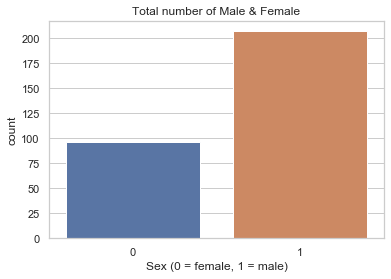

In [96]:
sns.countplot(x='sex', data=dataset)
plt.xlabel('Sex (0 = female, 1 = male)')
plt.title('Total number of Male & Female')
plt.show()

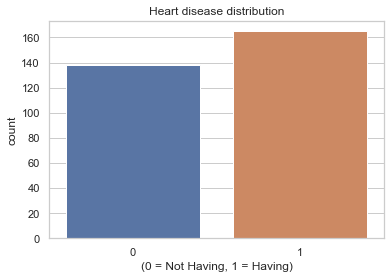

In [100]:
sns.countplot(x='target', data=dataset)
plt.xlabel('(0 = Not Having, 1 = Having)')
plt.title('Heart disease distribution')
plt.show()

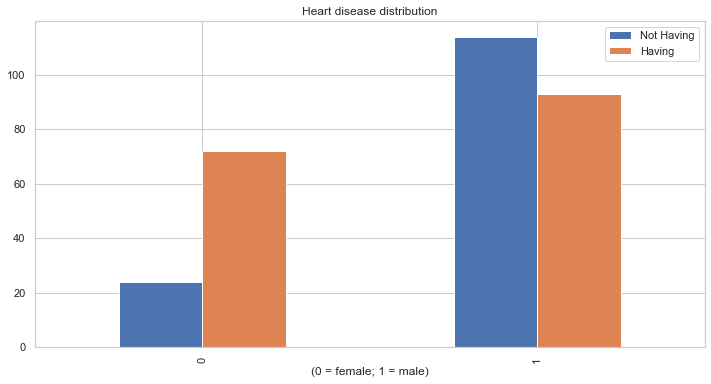

In [133]:
pd.crosstab(dataset.sex, dataset.target).plot(kind='bar', figsize=(12,6))
plt.legend(['Not Having', 'Having'])
plt.xlabel('(0 = female; 1 = male)')
plt.title('Heart disease distribution')
plt.show()

In [102]:
malesHavingDisease = dataset.loc[(dataset['sex'] == 1) & (dataset['target'] == 1)]
print(len(malesHavingDisease))

93


In [89]:
femalesHavingDisease = dataset.loc[(dataset['sex'] == 0) & (dataset['target'] == 1)]
print(len(femalesHavingDisease))

72


In [4]:
dataset.shape

(303, 14)

#### Data contains:

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

### Feature Engineering

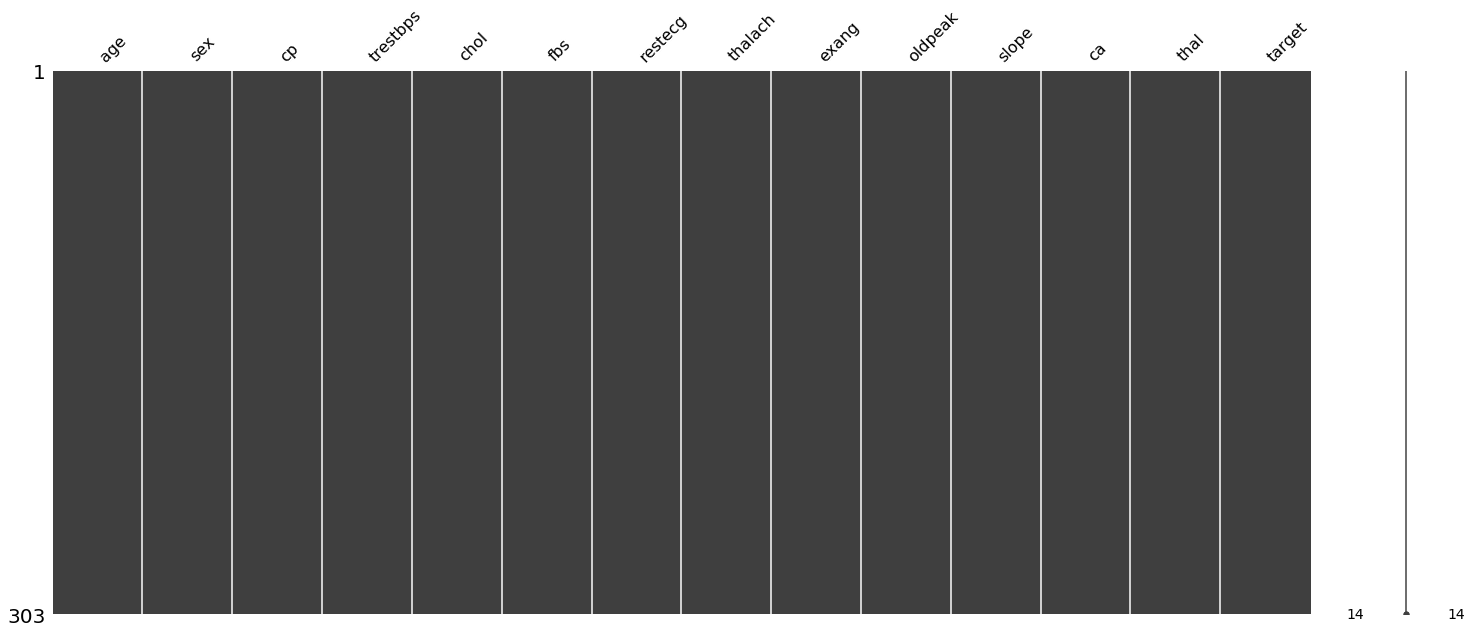

In [5]:
#Having a glance at null values in the dataset
msno.matrix(dataset)

There is no null values to take care of :)

### Feature Selection

#### Feature Selection - using Correlation Matrix with Heatmap

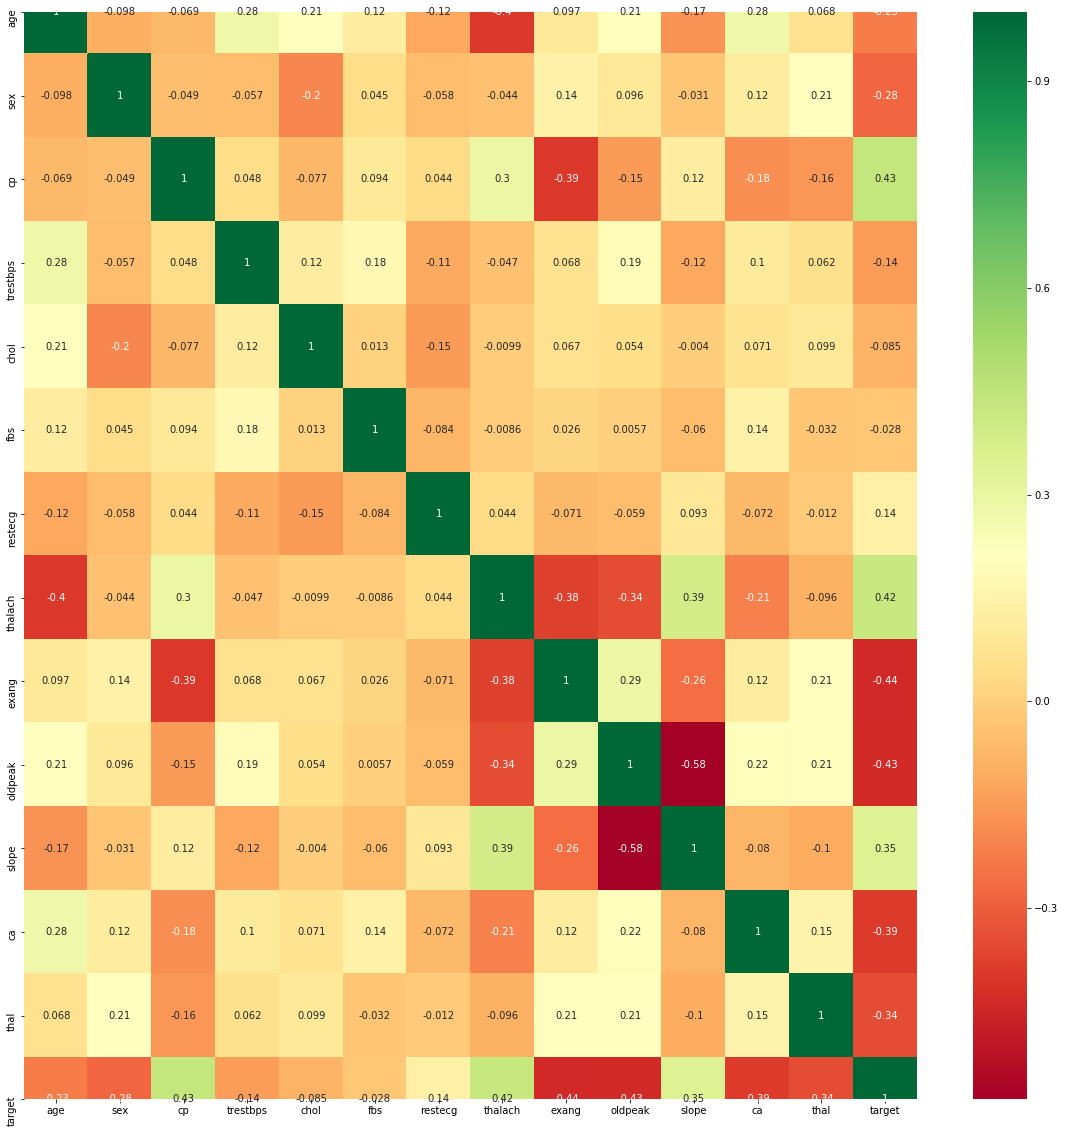

In [6]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Heatmap indicates that the patient/person have high chances of getting an heart attack (i.e., our Target variable) if he/she has high 'exang', 'oldpeak' and 'cp' values. As you can see that these three attributes are comparitively closer to the 'target' attribute.

Let also take a look at 'Univariate Selection' and 'Feature Importance' features to confirm the same what Heatmap did.

#### Feature Selection - using Univariate Selection

In [7]:
X = dataset.iloc[:,0:13]  #independent columns
y = dataset.iloc[:,-1]    #target column

In [8]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [9]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [10]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']  #naming the dataframe columns

In [11]:
featureScores

,Attribute,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalach,188.320472
8,exang,38.914377
9,oldpeak,72.644253


In [12]:
print(featureScores.nlargest(5,'Score'))  #print 3 best features

   Attribute       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377


Univariate selection indicates that 'thalach' is closely related to the 'target', whereas it has indicated two new attributes 'oldpeak' and 'ca' are closely related to the 'target'.

Lets take a look at 'Feature Importance' and see what it indicates.

#### Feature Selection - using Feature Importance

In [13]:
model = ExtraTreesClassifier()
model.fit(X,y)

d:\gitrepositories\machinelearning\ml_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [14]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.06868516 0.03895891 0.13236522 0.06260059 0.06064871 0.0224219
 0.03962629 0.06806821 0.13517965 0.09126978 0.0641958  0.10966487
 0.10631492]


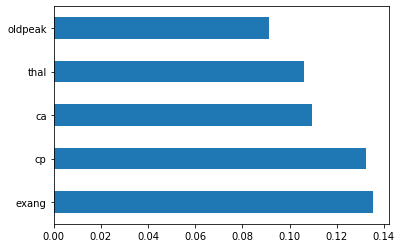

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Lets summarise top 5 attributes identified by each feature selection technique:

Heatmap - exang, oldpeak, cp, thalach, slope, 

Univariate selection - thalach, oldpeak, ca, cp, exang

Feature Importance - cp, thal, ca, exang, oldpeak

#### Feature selections conclude - 'exang', 'oldpeak' and 'cp' are the closely related to the Target attribute.

d:\gitrepositories\machinelearning\ml_env\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


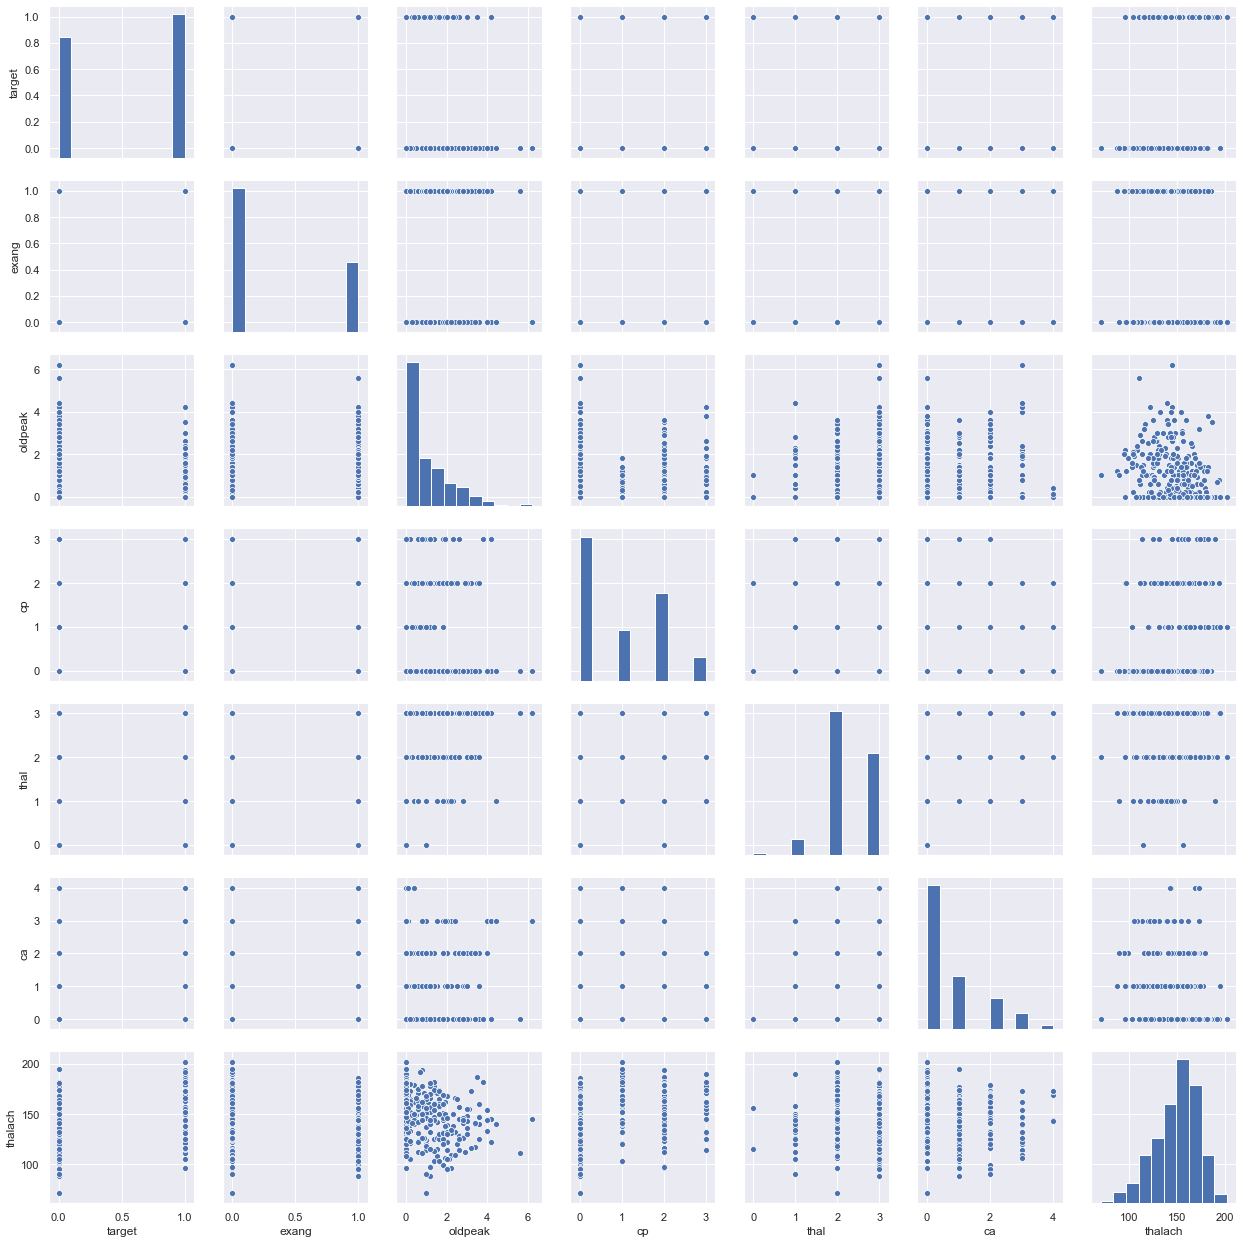

In [16]:
#scatterplot
sns.set()
cols = ['target', 'exang', 'oldpeak', 'cp', 'thal', 'ca', 'thalach']
sns.pairplot(dataset[cols], size = 2.5)
plt.show();

### Modelling

In [17]:
#Importing train_test_split from sklearn.model_selection to split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
#Importing StandardScaler from sklearn.preprocessing to scale matrix of features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Logistic Regression

In [19]:
#Importing LogisticRegression from sklearn.linear_model to build LogisticRegression classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

d:\gitrepositories\machinelearning\ml_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
# Accuracy in percentage
((cm[0,0] + cm[1,1]) / len(y_test)) * 100

83.60655737704919

In [24]:
# Inbuilt method to calculate accuracy
acc = lr.score(X_test, y_test) * 100

accuracies = {}

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 83.61%


#### K-Nearest Neighbour (KNN) Classification

In [25]:
#Importing KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

#Fitting K-NN to Training set
# Parameters 1: 'n_neighbors' is our 'K', thats 5 here.
# Parameters 2: 'metric' is set to 'minkowski', that the type of metric.
# Parameters 2: 'p' is set to 2, thats using 'Euclidean Distance formula'.

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test) * 100
acc

81.9672131147541

Index: 1, Score: 81.9672131147541
Index: 2, Score: 81.9672131147541
Index: 3, Score: 83.60655737704919
Index: 4, Score: 85.24590163934425
Index: 5, Score: 81.9672131147541
Index: 6, Score: 83.60655737704919
Index: 7, Score: 83.60655737704919
Index: 8, Score: 85.24590163934425
Index: 9, Score: 85.24590163934425
Index: 10, Score: 88.52459016393442
Index: 11, Score: 81.9672131147541
Index: 12, Score: 81.9672131147541
Index: 13, Score: 85.24590163934425
Index: 14, Score: 85.24590163934425
Index: 15, Score: 83.60655737704919
Index: 16, Score: 83.60655737704919
Index: 17, Score: 83.60655737704919
Index: 18, Score: 83.60655737704919
Index: 19, Score: 81.9672131147541


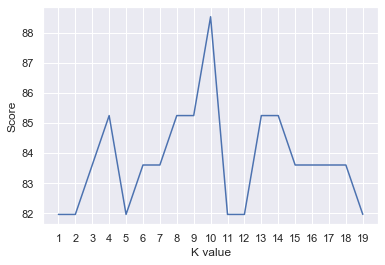

Maximum KNN Score is 88.52%


In [26]:
# trying to find best k value
scoreList = []
for i in range(1,20):
    knnTemp = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knnTemp.fit(X_train, y_train)
    knnTemp.predict(X_test)
    currScore = knnTemp.score(X_test, y_test) * 100
    scoreList.append(currScore)
    print("Index: {}, Score: {}".format(i, currScore))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

#### Support Vector Machine (SVM)

In [27]:
#Importing and Fitting SVM to Training set
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = svm.score(X_test, y_test) * 100
print(acc)
accuracies['SVM'] = acc

86.88524590163934


#### Naive Bayes

In [34]:
#Importing and Fitting Naive Bayes Algorithm to Training set
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = nb.score(X_test, y_test) * 100
print(acc)
accuracies['Naive Bayes'] = acc

85.24590163934425


#### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = dt.score(X_test, y_test) * 100
print(acc)
accuracies['Decision Tree'] = acc

73.77049180327869


#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = rf.score(X_test, y_test) * 100
print(acc)
accuracies['Random Forest'] = acc

85.24590163934425


In [31]:
accuracies

{'Logistic Regression': 83.60655737704919,
 'KNN': 88.52459016393442,
 'SVM': 86.88524590163934,
 'Naive Bayes': 85.24590163934425,
 'Decision Tree': 73.77049180327869,
 'Random Forest': 85.24590163934425}

### Comparing Models

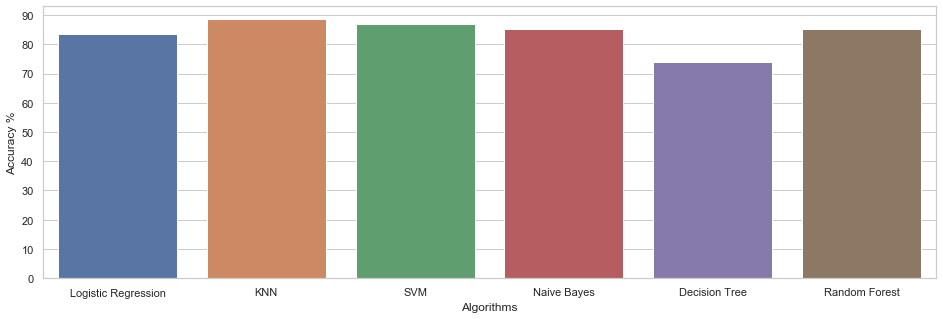

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

Our models work fine but best of them are KNN and SVM with 88.52% of accuracy. Let's look their confusion matrixes.

### Confusion Matrix

In [35]:
# Predicted values
y_head_lr = lr.predict(X_test)
#knn3 = KNeighborsClassifier(n_neighbors = 3)
#knn3.fit(x_train.T, y_train.T)
y_head_knn = knn.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dt = dt.predict(X_test)
y_head_rf = rf.predict(X_test)

In [37]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dt = confusion_matrix(y_test,y_head_dt)
cm_rf = confusion_matrix(y_test,y_head_rf)

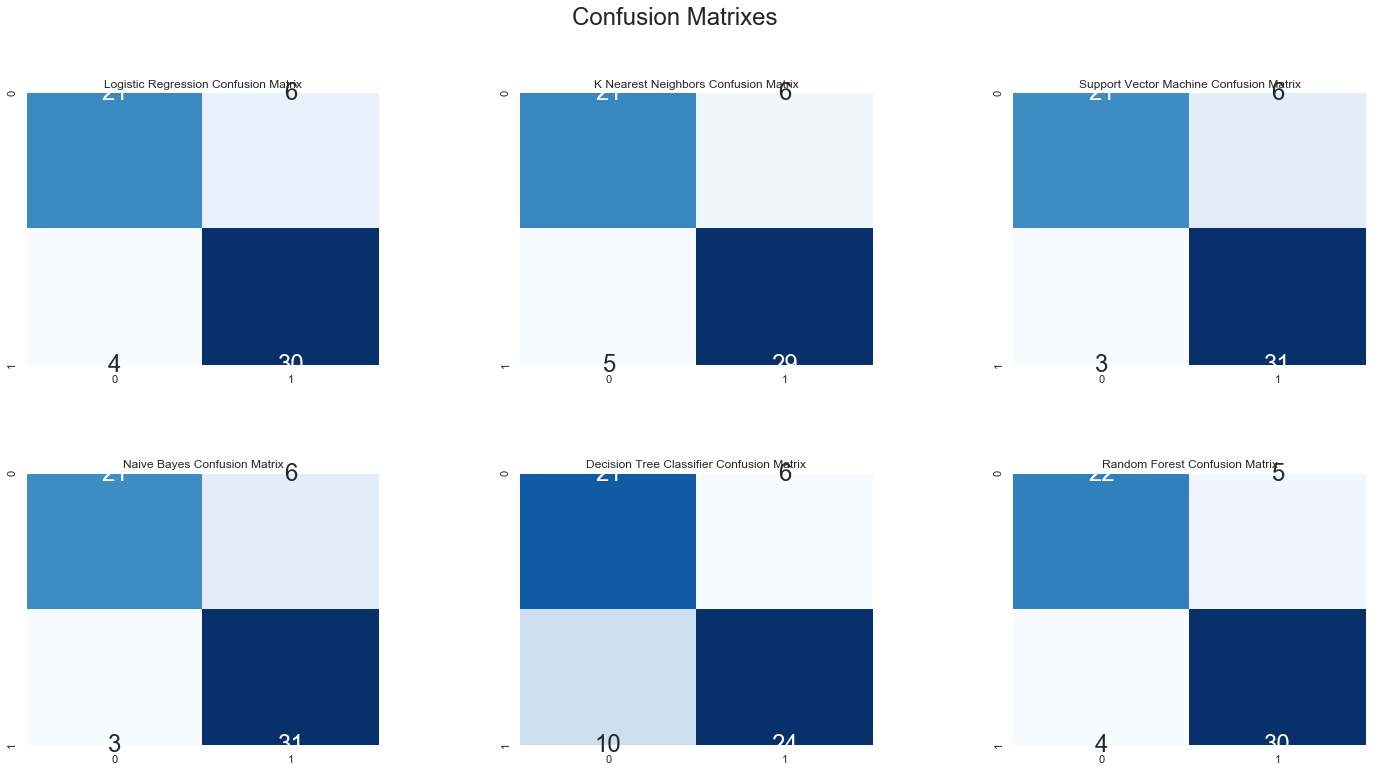

In [39]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()